## 단시간 푸리에 변환 (Short-Time Fourier Transform, STFT)

**단시간 푸리에 변환 (STFT)**은 신호의 시간-주파수 특성을 분석하는 방법으로, 신호를 작은 구간으로 나누어 각각의 구간에서 푸리에 변환을 적용하는 방식이다. 이 방법은 신호가 시간에 따라 변화하는 주파수 성분을 추적할 수 있게 해준다.

### 정의:
단시간 푸리에 변환(STFT)은 다음과 같이 정의된다:

$
X(t, f) = \int_{-\infty}^{\infty} x(\tau) w(\tau - t) e^{-j 2 \pi f \tau} d\tau
$

### 식의 직관적인 해석:
이 식을 직관적으로 풀이하면 다음과 같다.

- $ x(\tau) $ → 원래 신호 (시간에 따른 값)
- $ w(\tau - t) $ → 특정 시간 $ t $ 주변만 강조하도록 가중치를 주는 **윈도우 함수**  
  (예: 해밍창, 가우시안 윈도우 등 사용)
- $ e^{-j 2 \pi f \tau} $ → 특정 주파수 $ f $에 해당하는 복소수 형태의 **사인파**  
  (푸리에 변환에서 사용되는 기본적인 주파수 요소)
- 적분 $ \int_{-\infty}^{\infty} $ → 신호 전체에 대해 계산하지만, 윈도우 $ w(\tau - t) $ 때문에 특정 구간만 고려됨

즉, **STFT는 특정 시간 $ t $에서 신호를 작은 구간으로 자른 후, 그 구간에서 어떤 주파수 성분이 포함되어 있는지를 분석하는 과정**이다.

---

### 과정:
1. **윈도잉(Windowing)**: 전체 신호를 작은 구간으로 나누고, 각 구간에 윈도우 함수를 적용하여 구간의 데이터를 분리한다.
2. **푸리에 변환(Fourier Transform)**: 각 구간에 대해 푸리에 변환을 적용하여 주파수 성분을 추출한다.
3. **시간-주파수 분석**: 여러 구간에 대해 푸리에 변환을 반복하여 시간-주파수 스펙트럼을 얻는다.

---

### 특징:
- **시간-주파수 해상도**: STFT는 시간과 주파수의 해상도 사이에 트레이드오프가 있다.  
  → 구간 크기를 작게 하면 **시간 해상도는 높아지지만**, **주파수 해상도는 낮아짐**  
  → 구간 크기를 크게 하면 **주파수 해상도는 높아지지만**, **시간 해상도는 낮아짐**
- **시간에 따른 주파수 변화 추적**: STFT는 시간에 따라 변화하는 주파수 성분을 추적할 수 있어 음성, 음악, 통신 신호 등의 분석에 유용하다.

---

### 예시:
- **음악 신호 분석**: STFT를 사용하면 음악 신호에서 각 시간 구간에 포함된 주파수 성분을 추출할 수 있어, 각 악기의 특성이나 음성의 주파수 변화를 시간에 따라 분석할 수 있다.
- **음성 인식**: STFT는 음성 인식 시스템에서 음성 신호의 시간-주파수 특성을 분석하여 음성의 발음, 억양 등을 추출하는 데 사용된다.

---

### 장점:
- 신호의 주파수 성분을 시간에 따라 추적할 수 있다.
- 비정상적인 신호나 시간에 따라 변하는 주파수 성분을 분석할 수 있다.

### 단점:
- 시간과 주파수 해상도 사이에 트레이드오프가 있어 최적의 윈도우 크기를 선택하는 것이 중요하다.
- 신호가 매우 빠르게 변하는 경우에는 정확한 분석이 어려울 수 있다.


## 해밍창 (Hamming Window)

해밍창(Hamming Window)은 **단시간 푸리에 변환(STFT)**에서 신호의 한 구간을 부드럽게 감싸기 위해 사용하는 창 함수(Window Function) 중 하나다. 신호를 자를 때 갑작스러운 변화(불연속점)가 생기면 푸리에 변환 결과가 왜곡될 수 있기 때문에, 신호를 부드럽게 감싸서 이러한 문제를 줄인다.

---

### 해밍창 수식

해밍창 $ w(n) $는 다음과 같이 정의된다:

$
w(n) = 0.54 - 0.46 \cos \left( \frac{2\pi n}{N-1} \right), \quad 0 \leq n \leq N-1
$

여기서:
- $ n $ : 샘플 인덱스 (0부터 $ N-1 $까지)
- $ N $ : 창의 길이(윈도우 크기)
- $ w(n) $ : 각 샘플에 곱해지는 가중치 값

---

### 수식의 직관적인 해석

수식을 쉽게 풀어보면:

- $ 0.54 $ → 전체적으로 일정한 값이 들어가서 기본적인 크기를 유지한다.
- $ 0.46 \cos \left( \frac{2\pi n}{N-1} \right) $ → 코사인 함수가 적용되어 신호의 양 끝을 작게 만들어준다.  
  (즉, **양 끝을 부드럽게 깎아서 신호의 변화가 급격하지 않도록 함**)

즉, **해밍창은 신호의 양쪽 끝을 부드럽게 줄여서, 푸리에 변환 시 생길 수 있는 인위적인 왜곡(스펙트럼 립)을 줄이는 역할을 한다.**

---

### 해밍창의 그래프적 형태

해밍창을 그래프로 표현하면 다음과 같은 형태가 된다:


양 끝이 점점 줄어들고, 중앙 부분에서 최댓값을 유지하는 형태를 가진다.

---

### 해밍창을 사용하는 이유

1. **스펙트럼 립(Spectral Leakage) 감소**  
   - 신호를 자를 때 갑자기 끝을 자르면 푸리에 변환에서 불필요한 주파수 성분(립)이 생길 수 있다.  
   - 해밍창을 사용하면 신호가 부드럽게 연결되어 불필요한 립이 줄어든다.

2. **해닝창(Hanning Window)보다 조금 더 높은 스펙트럼 해상도 제공**  
   - 해밍창은 해닝창보다 중앙 주파수 성분을 조금 더 강하게 유지한다.  

---

### 해밍창과 다른 창 함수 비교

| 창 함수 | 수식 | 특징 |
|---------|------------------------------|----------------------------------|
| **사각창(Rectangular Window)** | $ w(n) = 1 $ | 신호를 그대로 자름 → 스펙트럼 립 큼 |
| **해닝창(Hanning Window)** | $ w(n) = 0.5 - 0.5 \cos \left( \frac{2\pi n}{N-1} \right) $ | 해밍창보다 양 끝이 더 작음 (부드러움) |
| **해밍창(Hamming Window)** | $ w(n) = 0.54 - 0.46 \cos \left( \frac{2\pi n}{N-1} \right) $ | 중앙 주파수 성분을 더 유지 |

---

### 정리

- **해밍창은 신호를 잘라 푸리에 변환할 때 경계를 부드럽게 만들어주는 역할을 한다.**
- **스펙트럼 립을 줄여 불필요한 주파수 성분이 생기는 걸 방지한다.**
- **해닝창보다 중심 주파수를 더 잘 유지하지만, 약간의 립이 더 생길 수 있다.**


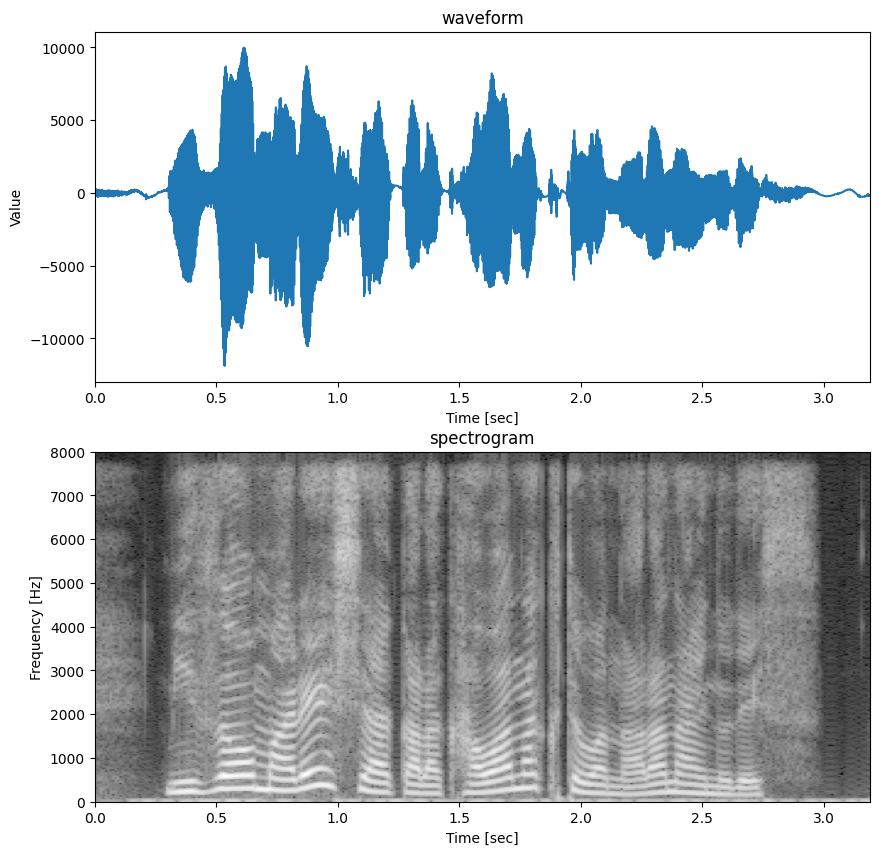

: 

In [1]:
# -*- coding: utf-8 -*-

#
# 단시간 푸리에 변환(STFT)을 이용하여
# 음성의 스펙트로그램을 생성하는 코드
#

# wav 파일을 다루기 위한 wave 모듈 임포트
import wave

# 수치 연산을 위한 numpy 모듈 임포트
import numpy as np

# 그래프를 그리기 위한 matplotlib 모듈 임포트
import matplotlib.pyplot as plt

#
# 메인 함수
#
if __name__ == "__main__":
    # 입력할 wav 파일 경로
    wav_file = '../data/wav/BASIC5000_0001.wav'

    # 프레임 크기 (단위: 밀리초)
    frame_size = 25
    # 프레임 이동 크기 (단위: 밀리초)
    frame_shift = 10

    # 생성된 스펙트로그램을 저장할 파일 (PNG 파일)
    out_plot = './spectrogram.png'

    # wav 파일을 열고 데이터 처리 수행
    with wave.open(wav_file) as wav:
        # 샘플링 주파수 [Hz]를 가져옴
        sample_frequency = wav.getframerate()

        # wav 데이터의 총 샘플 개수를 가져옴
        num_samples = wav.getnframes()

        # wav 데이터를 읽어옴
        waveform = wav.readframes(num_samples)

        # 읽어온 데이터는 16비트 정수(binary)이므로
        # 이를 숫자(정수)로 변환
        waveform = np.frombuffer(waveform, dtype=np.int16)

    # 프레임 크기를 밀리초에서 샘플 개수로 변환
    frame_size = int(sample_frequency * frame_size * 0.001)

    # 프레임 이동 크기를 밀리초에서 샘플 개수로 변환
    frame_shift = int(sample_frequency * frame_shift * 0.001)

    # FFT를 수행할 샘플 개수를
    # 프레임 크기 이상인 2의 거듭제곱으로 설정
    fft_size = 1
    while fft_size < frame_size:
        fft_size *= 2

    # 단시간 푸리에 변환을 수행할 총 프레임 개수 계산
    num_frames = (num_samples - frame_size) // frame_shift + 1

    # 스펙트로그램 데이터를 저장할 행렬 생성
    spectrogram = np.zeros((num_frames, int(fft_size/2)+1))

    # 각 프레임에 대해 진폭 스펙트럼 계산
    for frame_idx in range(num_frames):
        # 분석 시작 위치 = 프레임 번호 * 프레임 이동 크기
        start_index = frame_idx * frame_shift

        # 한 프레임 길이만큼의 파형을 추출
        frame = waveform[start_index : start_index + frame_size].copy()

        # 해밍 창(Hamming window) 적용
        frame = frame * np.hamming(frame_size)

        # 빠른 푸리에 변환(FFT) 수행
        spectrum = np.fft.fft(frame, n=fft_size)

        # 진폭 스펙트럼 계산
        absolute = np.abs(spectrum)

        # FFT 결과는 좌우 대칭이므로, 왼쪽 절반만 사용
        absolute = absolute[:int(fft_size/2) + 1]

        # 로그 변환을 적용하여 로그 진폭 스펙트럼 계산
        log_absolute = np.log(absolute + 1E-7)

        # 계산 결과를 스펙트로그램 행렬에 저장
        spectrogram[frame_idx, :] = log_absolute

    #
    # 시간 영역 파형과 스펙트로그램을 플롯
    #

    # 그래프를 그릴 영역 생성
    plt.figure(figsize=(10,10))

    # 그래프를 위아래 두 개로 분할하여
    # 위쪽에 시간 영역 파형을 그림
    plt.subplot(2, 1, 1)

    # x축 (시간축) 생성
    time_axis = np.arange(num_samples) / sample_frequency

    # 시간 영역 파형을 플롯
    plt.plot(time_axis, waveform)

    # 제목 및 x축, y축 라벨 설정
    plt.title('waveform')
    plt.xlabel('Time [sec]')
    plt.ylabel('Value')

    # x축 범위를 0초부터 전체 길이까지 설정
    plt.xlim([0, num_samples / sample_frequency])

    # 아래쪽 영역에 스펙트로그램을 그림
    plt.subplot(2, 1, 2)

    # 스펙트로그램의 최대값을 0으로 맞추기 위해
    # 컬러맵의 범위를 조정
    spectrogram -= np.max(spectrogram)
    vmax = np.abs(np.min(spectrogram)) * 0.0
    vmin = - np.abs(np.min(spectrogram)) * 0.7

    # 스펙트로그램을 이미지 형태로 출력
    plt.imshow(spectrogram.T[-1::-1,:], 
               extent=[0, num_samples / sample_frequency, 
                       0, sample_frequency / 2],
               cmap = 'gray',
               vmax = vmax,
               vmin = vmin,
               aspect = 'auto')

    # 제목 및 x축, y축 라벨 설정
    plt.title('spectrogram')
    plt.xlabel('Time [sec]')
    plt.ylabel('Frequency [Hz]')

    # 생성된 그래프를 이미지 파일로 저장
    plt.savefig(out_plot)


## 스펙트로그램 해석 방법

스펙트로그램(Spectrogram)은 시간에 따른 신호의 주파수 성분을 시각적으로 표현한 것이다.  
**x축은 시간(time), y축은 주파수(frequency), 색상(color intensity)은 신호의 세기(magnitude, amplitude)를 나타낸다.**  
일반적으로 색상이 밝거나 짙을수록 해당 주파수에서 신호의 강도가 크다는 의미이다.

---

### 1. **스펙트로그램의 기본 요소**
- **시간 (x축)**  
  - 왼쪽에서 오른쪽으로 갈수록 시간이 흐른다.
  - 신호가 특정 시간대에서 변화하는 패턴을 확인할 수 있다.

- **주파수 (y축)**  
  - 아래쪽은 낮은 주파수, 위쪽은 높은 주파수를 의미한다.
  - 저주파(낮은 영역)는 저음, 고주파(높은 영역)는 고음을 나타낸다.

- **색상(진폭, 강도)**  
  - 밝거나 짙은 부분은 강한 신호(높은 진폭)를 의미한다.
  - 어두운 부분은 약한 신호(낮은 진폭)를 의미한다.
  - 일반적으로 **밝은 노란색 또는 흰색**이 높은 진폭, **검은색 또는 파란색**이 낮은 진폭을 나타낸다.

---

### 2. **해석 방법**
1. **특정 주파수에서 강한 신호가 지속되면?**  
   - 특정 음조(예: 음악의 특정 음 높이)가 지속적으로 유지되고 있다는 의미이다.  
   - 예: **모노톤 소리, 배경 잡음, 지속적인 저음(베이스음)**

2. **고주파 성분이 강하다면?**  
   - 고주파는 일반적으로 **날카로운 소리, 치찰음(예: "sh", "s") 또는 금속성 소리**와 관련이 있다.  
   - 예: **새소리, 휘파람 소리, 마찰음**

3. **주파수가 넓게 분포하면?**  
   - 신호가 여러 주파수를 포함하고 있다는 의미이다.  
   - 예: **드럼 소리, 백색소음, 환경음(바람, 비 소리)**

4. **수직선 패턴이 보인다면?**  
   - 순간적인 소리(임펄스 신호)가 발생했음을 의미한다.  
   - 예: **박수 소리, 탬버린 소리, 킥 드럼**

5. **수평선 패턴이 보인다면?**  
   - 특정 주파수에서 지속적인 신호가 존재함을 의미한다.  
   - 예: **피아노의 지속음, 사람의 목소리의 포먼트(formant)**

6. **주파수가 점진적으로 증가 또는 감소하면?**  
   - 신호의 음높이가 상승 또는 하강하는 패턴을 의미한다.  
   - 예: **사이렌 소리, 글리산도(滑奏, glissando), 상승하는 노래 멜로디**

---

### 3. **예제 해석**
#### 1) **사람의 음성 (Speech)**
   - 저주파 영역(300Hz~3kHz)에 강한 에너지가 분포
   - 수평선 구조: 음성의 포먼트(formant) 특징이 나타남
   - 순간적인 수직선 패턴: 자음(특히 파열음 "p", "t", "k")의 존재

#### 2) **음악 (Music)**
   - 멜로디 악기는 선명한 수평선 구조를 가짐
   - 드럼과 같은 타악기 소리는 수직선 형태로 나타남
   - 화음이 있는 경우 여러 개의 주파수 성분이 동시에 나타남

#### 3) **배경 소음 (Noise)**
   - 특정 주파수 패턴 없이 넓은 영역에 분포
   - 바람 소리, 비 소리 등은 랜덤한 주파수 성분을 가짐
   - 기계 소음의 경우 특정 주파수에서 일정한 패턴이 나타남

---

### 4. **스펙트로그램 분석을 위한 팁**
- **색상이 점점 변화하는지 확인:** 주파수 성분이 시간에 따라 변하는지를 관찰
- **수직선/수평선 패턴 확인:** 임펄스 신호인지 지속 신호인지 구별
- **고주파 성분 주의 깊게 분석:** 소리의 날카로움, 잡음 여부 등을 평가
- **로그 스케일(Log scale) 사용 가능:** 인간의 청각 특성(저주파에 민감, 고주파에 둔감)을 반영할 수 있음

---

### 5. **결론**
스펙트로그램을 해석하는 것은 신호의 시간-주파수 특성을 분석하는 중요한 방법이다.  
**특정 패턴을 찾아내고, 시간과 주파수 변화 양상을 분석**하면 음성, 음악, 환경 소음 등의 특징을 효과적으로 파악할 수 있다.
